# Import Data

In [31]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [33]:
# Assign path string to variable using raw string r'
path = r'D:\Docs\Career Foundry\II. Data Immersion\6. Advanced Analytics & Dashboard Design\Spotify Database - Alina Racu'

In [34]:
# Import csv file
df = pd.read_csv(os.path.join(path, "02 Data", "Prepared Data", "df_tracks_features.csv" ))

# Consistency Checks

In [35]:
# Show all columns
pd.options.display.max_columns = None

In [36]:
# Check
df.head()

,Unnamed: 0,position,track_name,artist,streams,date,country,album,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_year,release_date,_merge
0,0,12,Dile Que Tu Me Quieres,Ozuna,8982,2017-01-01,Ecuador,Odisea,False,0.773,0.757,-4.959,1,0.0526,0.0864,0.000004,0.0727,0.858,88.006,226520,2017,2017-08-25,both
1,1,12,Dile Que Tu Me Quieres,Ozuna,8048,2017-01-02,Ecuador,Odisea,False,0.773,0.757,-4.959,1,0.0526,0.0864,0.000004,0.0727,0.858,88.006,226520,2017,2017-08-25,both
2,2,12,Dile Que Tu Me Quieres,Ozuna,8425,2017-01-03,Ecuador,Odisea,False,0.773,0.757,-4.959,1,0.0526,0.0864,0.000004,0.0727,0.858,88.006,226520,2017,2017-08-25,both
3,3,12,Dile Que Tu Me Quieres,Ozuna,8808,2017-01-04,Ecuador,Odisea,False,0.773,0.757,-4.959,1,0.0526,0.0864,0.000004,0.0727,0.858,88.006,226520,2017,2017-08-25,both
4,4,11,Dile Que Tu Me Quieres,Ozuna,8307,2017-01-05,Ecuador,Odisea,False,0.773,0.757,-4.959,1,0.0526,0.0864,0.000004,0.0727,0.858,88.006,226520,2017,2017-08-25,both


In [37]:
# Remove columns
df = df.drop(columns = ["Unnamed: 0", "_merge"])

In [38]:
# Check
df.head()

,position,track_name,artist,streams,date,country,album,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_year,release_date
0,12,Dile Que Tu Me Quieres,Ozuna,8982,2017-01-01,Ecuador,Odisea,False,0.773,0.757,-4.959,1,0.0526,0.0864,0.000004,0.0727,0.858,88.006,226520,2017,2017-08-25
1,12,Dile Que Tu Me Quieres,Ozuna,8048,2017-01-02,Ecuador,Odisea,False,0.773,0.757,-4.959,1,0.0526,0.0864,0.000004,0.0727,0.858,88.006,226520,2017,2017-08-25
2,12,Dile Que Tu Me Quieres,Ozuna,8425,2017-01-03,Ecuador,Odisea,False,0.773,0.757,-4.959,1,0.0526,0.0864,0.000004,0.0727,0.858,88.006,226520,2017,2017-08-25
3,12,Dile Que Tu Me Quieres,Ozuna,8808,2017-01-04,Ecuador,Odisea,False,0.773,0.757,-4.959,1,0.0526,0.0864,0.000004,0.0727,0.858,88.006,226520,2017,2017-08-25
4,11,Dile Que Tu Me Quieres,Ozuna,8307,2017-01-05,Ecuador,Odisea,False,0.773,0.757,-4.959,1,0.0526,0.0864,0.000004,0.0727,0.858,88.006,226520,2017,2017-08-25


# Prepare Data for Regression Analysis

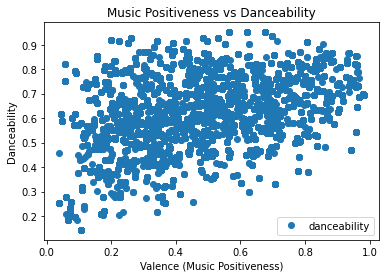

In [39]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other
df.plot(x = "valence", y= "danceability", style="o") # The style option creates a scatterplot; without it, we only have lines
plt.title("Music Positiveness vs Danceability")  
plt.xlabel("Valence (Music Positiveness)")  
plt.ylabel("Danceability")  
plt.show()

Hypothesis: The more danceable the song is, the higher the song scores on music positiveness.

In [40]:
# Reshape the variables into NumPy arrays and put them into separate objects
X = df["valence"].values.reshape(-1,1)
y = df["danceability"].values.reshape(-1,1)

In [41]:
# Check
X

array([[0.858],
       [0.858],
       [0.858],
       ...,
       [0.389],
       [0.395],
       [0.389]])

In [42]:
# Check
y

array([[0.773],
       [0.773],
       [0.773],
       ...,
       [0.597],
       [0.598],
       [0.597]])

In [43]:
# Split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression Analysis 

In [44]:
# Create a regression object
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set

In [45]:
# Fit the regression object onto the training set / fit the model to the training set
regression.fit(X_train, y_train)

LinearRegression()

In [46]:
# Predict the values of y using X / create a prediction for y on the test set
y_predicted = regression.predict(X_test)

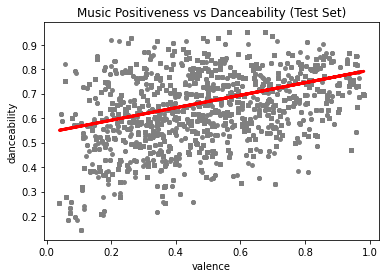

In [47]:
# Create a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title("Music Positiveness vs Danceability (Test Set)")
plot_test.xlabel("valence")
plot_test.ylabel("danceability")
plot_test.show()

The data points are very scattered. There are some points scoring low valence (i.e. sad songs), but high on danceability.

In [48]:
# In order to check the accuracy of the model, you need to check its performance in more ways than just visually
# Create objects that contain the model summary statistics (slope, root mean squared error, R2 score)

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score

In [49]:
# Print the model summary statistics. This is where you evaluate the performance of the model
print('Slope:', regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.25556332]]
Mean squared error:  0.01875051657211938
R2 score:  0.13565103525722688


In [50]:
y_predicted.max()

0.7912076259955094

* A positive slope indicates a positive relationship, i.e. the higher a song's positiveness and cheerfuless, the higher the danceability of the song. 
* A low MSE means that the regression line passes fairly close to the observations, making it a good fit. In this case, the MSE seems low (0.038); however, considering that the scale of the values is actually low toom up until around 0.68, the MSE value may not be that low after all.
* R2 score is a metric that shows how well the model explains the variance in the data. In this model, an R2 of 13.5% indicates a poor fit.

In [51]:
y_predicted

array([[0.68029315],
       [0.69562695],
       [0.65857026],
       ...,
       [0.57857895],
       [0.63863633],
       [0.78507411]])

In [52]:
# Create a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.732,0.680293
1,0.762,0.695627
2,0.692,0.658570
3,0.853,0.785074
4,0.881,0.648092
5,0.739,0.717350
6,0.358,0.666493
7,0.698,0.653970
8,0.653,0.596213
9,0.331,0.720672


## Compare how the regression fits the training set

In [53]:
# Predict the values of y using X
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [54]:
# Create objects that contain the model summary statistics (slope, root mean squared error, R2 score)
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [55]:
print('Slope:' , regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.25556332]]
Mean squared error:  0.01874454451400702
R2 score:  0.13520002630828287


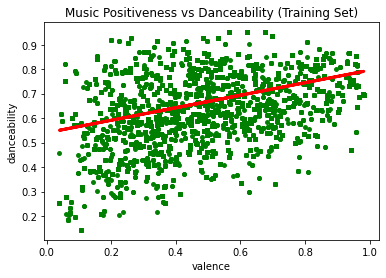

In [56]:
# Visualizing the training set results

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title("Music Positiveness vs Danceability (Training Set)")
plot_test.xlabel("valence")
plot_test.ylabel("danceability")
plot_test.show()

The model fits the training set only slightly worse than the test set (confirmed by an R2 score of 0.1352), which means I did not overfit the model. However, it also confirms that the relationship is not linear.

I can rule out the hypothesis that the higher the song scores on music positiveness, the more danceable it is.